<a id="section6"></a>
## 2.6 Mapping Categorical Data

Mapping categorical data, also called qualitative data, is a bit more straightforward. There is no need to scale or classify data values. The goal of the color map is to provide a contrasting set of colors so as to clearly delineate different categories. Let's check out a polygon and a point example.

First, load the census tract data for all of California and then set the colors as a funciton of the County FIPS code (`COUNTYFP`).

In [98]:
#load the census tract data for all of california
cal_tracts = gpd.read_file("zip://../notebook_data/census/Tracts/cb_2018_06_tract_500k.zip")

In [43]:
cal_tracts.head(2)

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."


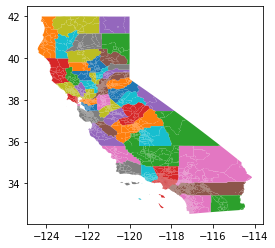

In [44]:
cal_tracts.plot(column='COUNTYFP', categorical=True)

This provides a quick way to see the CA county boundaries.

We can similarly create a categorical map of points with our alameda county census tract data.

First we need to create a qualitative variable, which in this example we call `majority_white`.

In [45]:
tracts_acs_gdf_point['majority_white'] = 'no' # default value
tracts_acs_gdf_point.loc[(tracts_acs_gdf_point['p_white']> 0.5), 'majority_white'] = 'yes'

And now plot it!

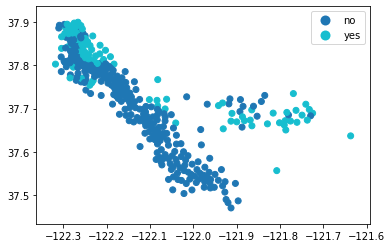

In [46]:
tracts_acs_gdf_point.plot(column='majority_white',  categorical=True, legend=True)

<a id="section7"></a>
## 2.7 Saving your Map


You can save your maps with the `plt.savefig` method.

> **Important**: you must `plt.savefig` your map before you display it with `plt.show()`! 

For example...

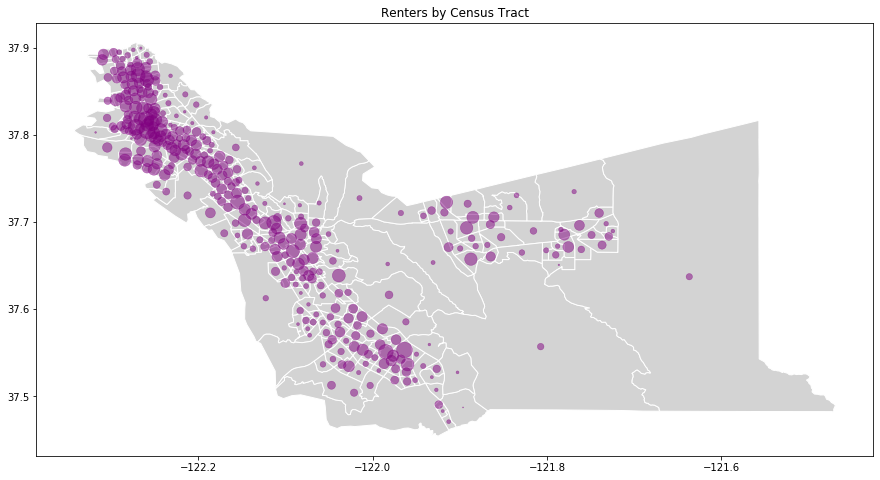

In [47]:
fig, ax = plt.subplots(figsize = (15,10)) 

tracts_acs_gdf.plot(color='lightgrey',
                    edgecolor='white',
                    ax=ax)

tracts_acs_gdf_point.plot(color='purple', 
                          alpha=0.5, 
                          linewidths=0.5, 
                          markersize=(tracts_acs_gdf_point['c_renters']/10),
                          legend=True,
                          ax=ax)
ax.set_title("Renters by Census Tract")

# Save figure 
plt.savefig("../outdata/AC_renters.png")

# Then show plot
plt.show()

Take a look at your saved map file (double-click in this cell to see how this is done.)

![mymap](../outdata/AC_renters.png)